## TP3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en `Material_TPs/TP3/images` a partir del template `Material_TPs/TP3/template`
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

**Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección**


### Resolución

Para cada imagen, para obtener la detección:
- Construi una pirámide gaussiana para escalar la imagen (up & down)
- Seleccioné el tamaño de imagen para el cual el logo era de dimensiones similares al template. La guardé en la carpeta `selected` para poder usarla luego con el algoritmo para múltiples detecciones.
- Para realizar el match implementé la función `matchTemplate`. Realicé el match probando distintos métodos. Además, según las características de la imagen, experimenté con escala de grises o edges, y con distinto template - el original o con colores invertidos. En el caso que la imagen seleccionada fuera menor que el template, la función hace previamente un resize del template.
- Finalmente seleccioné la opción que mejor resultado dio y la guardé en la carpeta `matched`.


In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)

# match_template es un archivo python que contiene las distintas funciones implementadas
import match_template as mt
from match_template import matchTemplate
from imagenes_util import piramide_gaussiana

# imagenes_util es un archivo python con funciones para visualizar las imágenes.
# El objetivo de este archivo fue tener una Notebook lo más despejada de código que dificulte la lectura. 
import imagenes_util as img_util

import glob

### COCA-COLA-LOGO.jpg

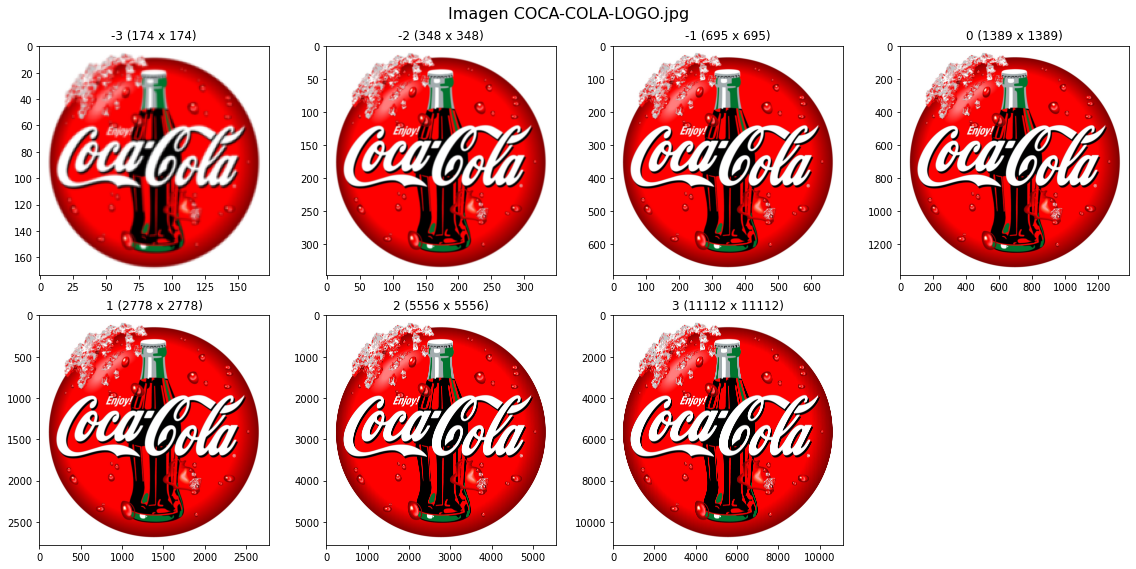

In [2]:
img_name = 'COCA-COLA-LOGO.jpg'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

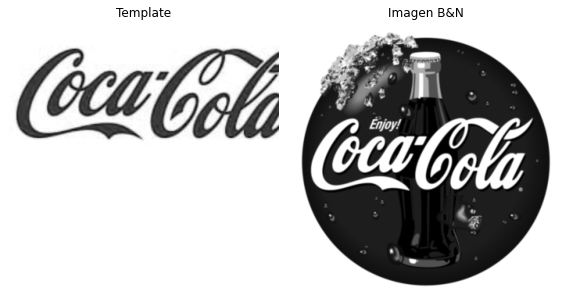

In [3]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[-2].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


En este caso el template es más grande, pero luego la función matchTemplate le hace un resize adecuado.

cv.TM_CCOEFF (-5.661e+07, 1.369e+08)
cv.TM_CCOEFF_NORMED (-0.2861, 0.6846)
cv.TM_CCORR (4.892e+07, 2.533e+08)
cv.TM_CCORR_NORMED (0.1601, 0.7886)
cv.TM_SQDIFF (3.85e+08, 1.074e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


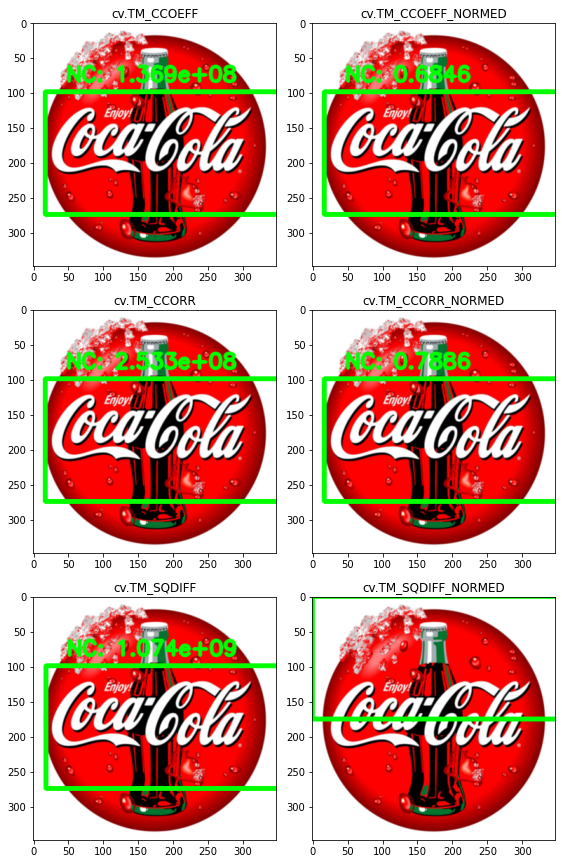

In [4]:
# Template matching usando diferentes métodos, comparando la imagen en escala de grises vs el template invertido
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo
                                              , cual_imagen=mt.IMG_GRAY
                                              , cual_template=mt.TEMPLATE_INVERTIDO
                                              )
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [5]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### coca_logo_1.png

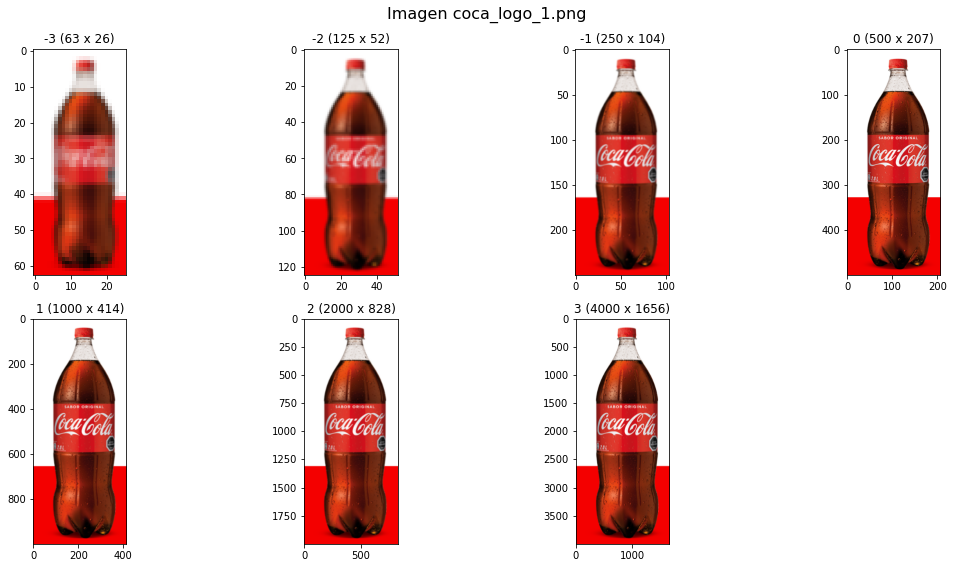

In [6]:
img_name = 'coca_logo_1.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

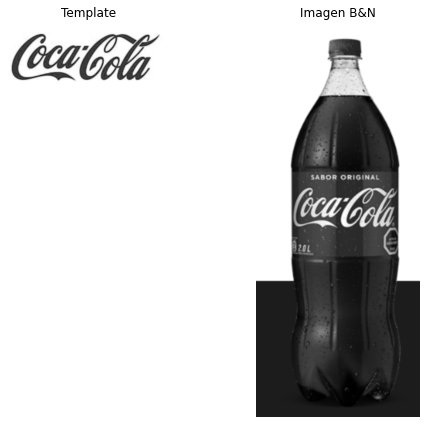

In [7]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-2.328e+07, 6.691e+06)
cv.TM_CCOEFF_NORMED (-0.1026, 0.03562)
cv.TM_CCORR (9.062e+07, 3.166e+08)
cv.TM_CCORR_NORMED (0.1406, 0.2724)
cv.TM_SQDIFF (3.447e+09, 3.647e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


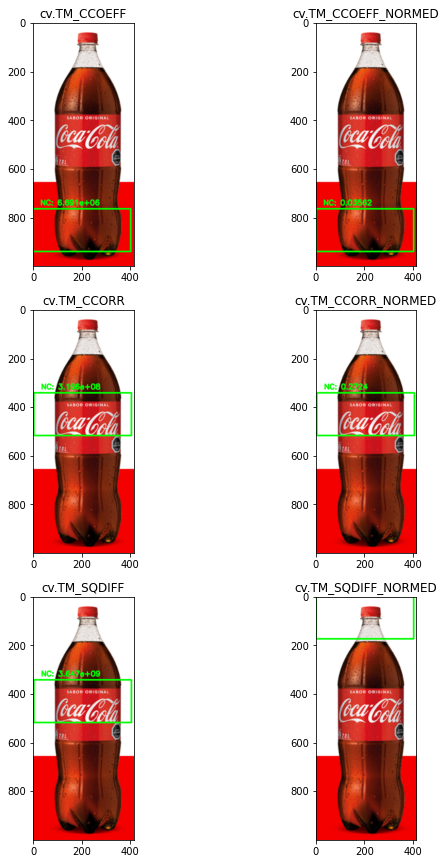

In [8]:
# Template matching usando diferentes métodos, comparando la imagen de bordes vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [9]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### coca_logo_2.png

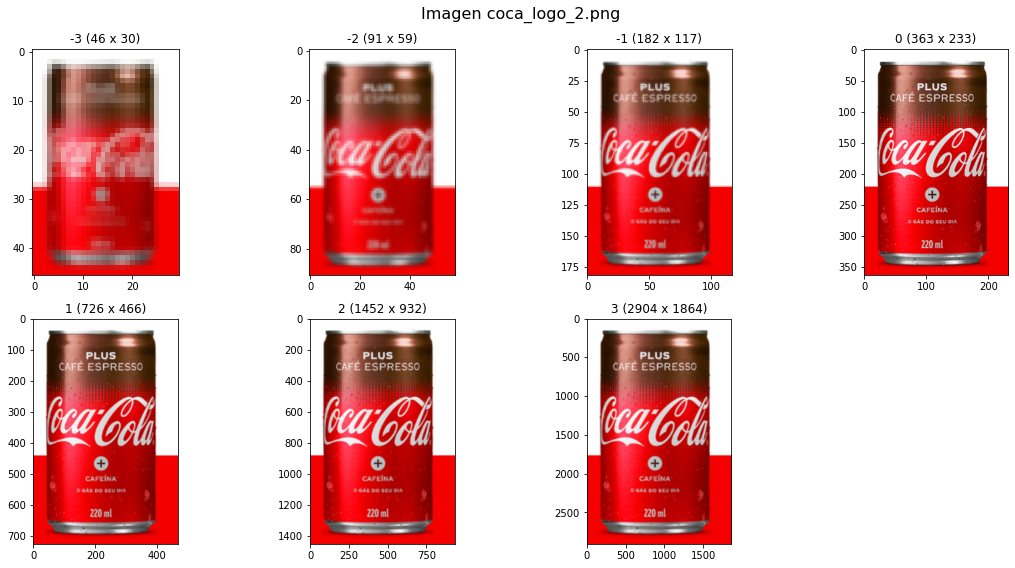

In [10]:
img_name = 'coca_logo_2.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

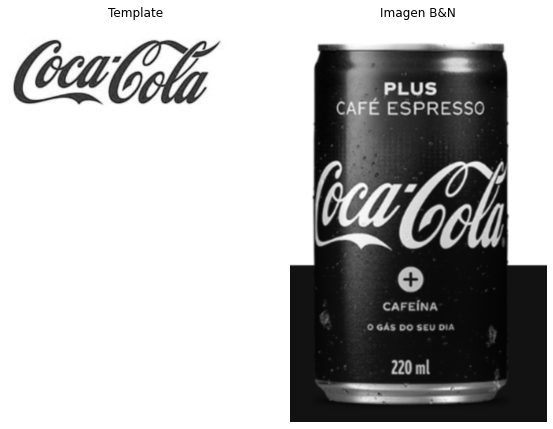

In [11]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-3.782e+07, 1.842e+07)
cv.TM_CCOEFF_NORMED (-0.1182, 0.06514)
cv.TM_CCORR (1.311e+08, 6.685e+08)
cv.TM_CCORR_NORMED (0.1683, 0.4008)
cv.TM_SQDIFF (3.128e+09, 3.618e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


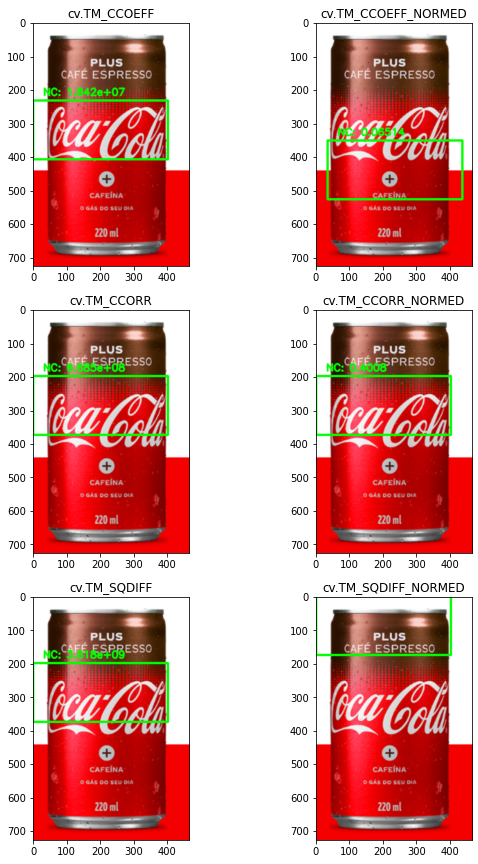

In [12]:
# Template matching usando diferentes métodos, comparando imagen de bordes vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [13]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCOEFF
img_util.save_image('matched/' + img_name, output['cv.TM_CCOEFF'], img_rgb.shape)

### coca_retro_1.png

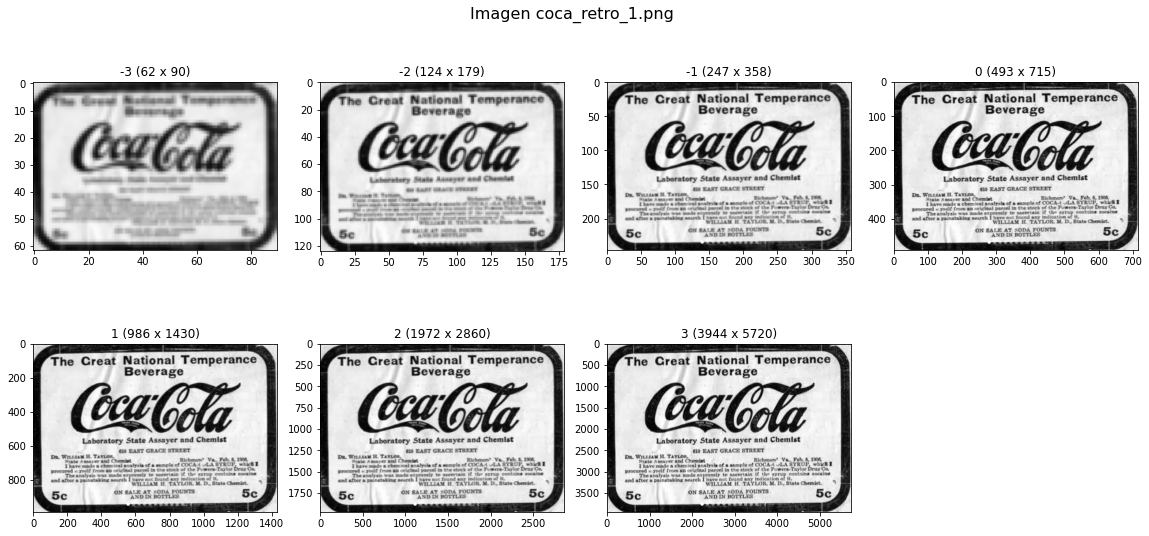

In [14]:
img_name = 'coca_retro_1.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

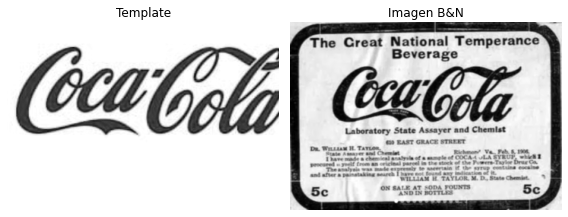

In [15]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[-1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-3.17e+07, 5.23e+07)
cv.TM_CCOEFF_NORMED (-0.1893, 0.3075)
cv.TM_CCORR (1.583e+09, 1.928e+09)
cv.TM_CCORR_NORMED (0.8398, 0.9262)
cv.TM_SQDIFF (3.369e+08, 6.939e+08)
cv.TM_SQDIFF_NORMED (0.162, 0.3682)


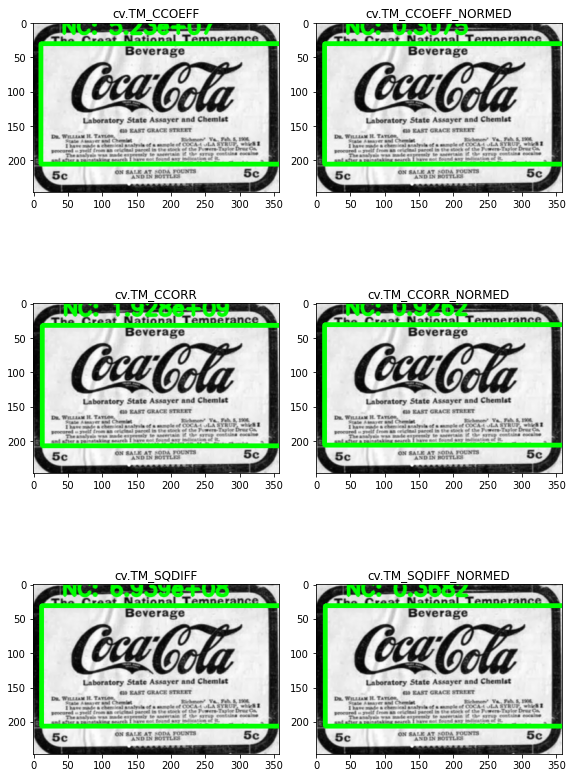

In [16]:
# Template matching usando diferentes métodos, comparando la imagen en escala de grises vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo, cual_imagen=mt.IMG_GRAY)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [17]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### coca_retro_2.png

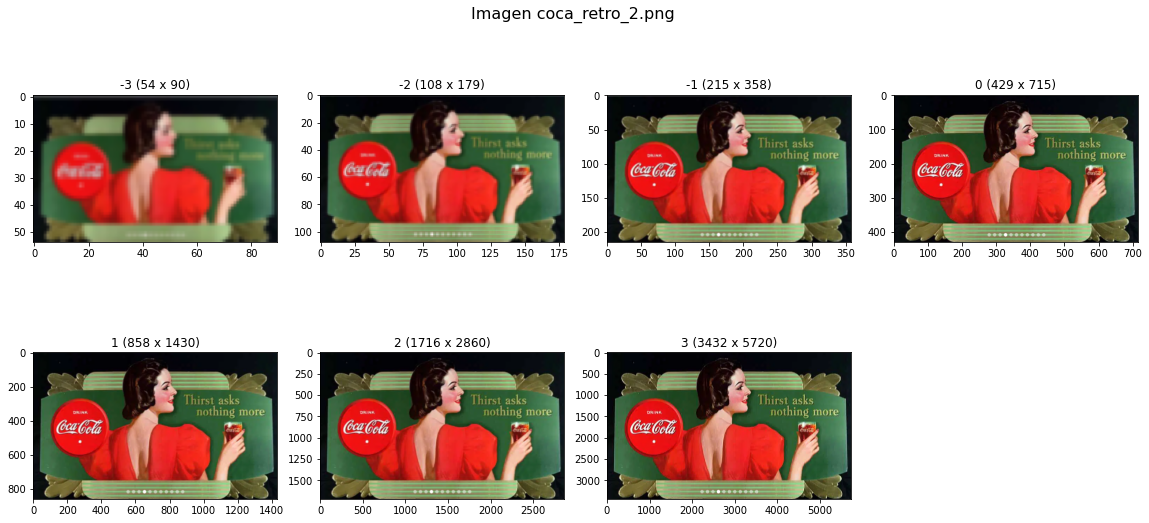

In [18]:
img_name = 'coca_retro_2.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

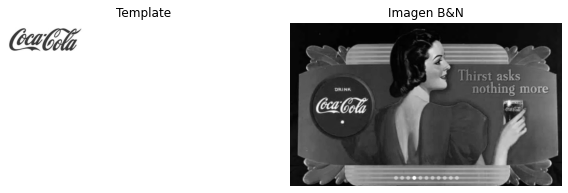

In [19]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-1.973e+07, 2.759e+07)
cv.TM_CCOEFF_NORMED (-0.1088, 0.1222)
cv.TM_CCORR (3.547e+05, 6.693e+07)
cv.TM_CCORR_NORMED (0.00463, 0.2419)
cv.TM_SQDIFF (2.459e+08, 5.301e+08)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


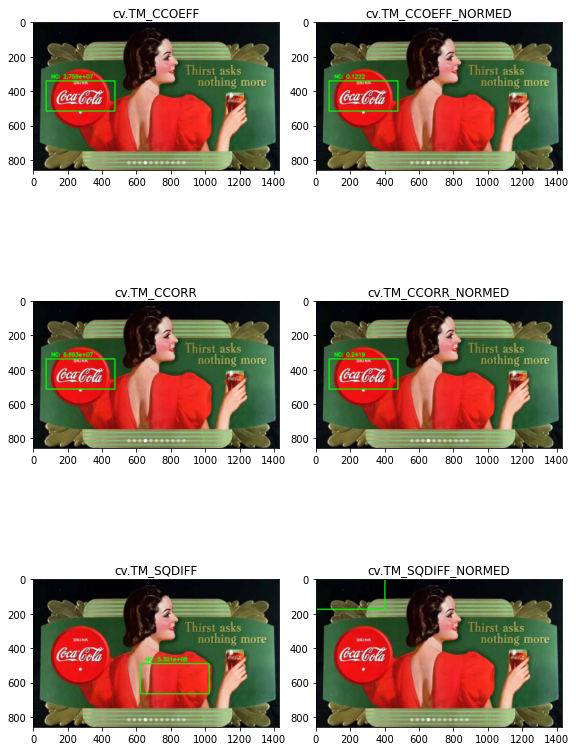

In [20]:
# Template matching usando diferentes métodos, comparando la imagen de bordes vs el template invertido
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo
                                              , cual_template=mt.TEMPLATE_INVERTIDO
                                              )
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [21]:
# Tanto COEFF como CCORR dan buen resultado.
# Elijo guardar el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### logo_1.png

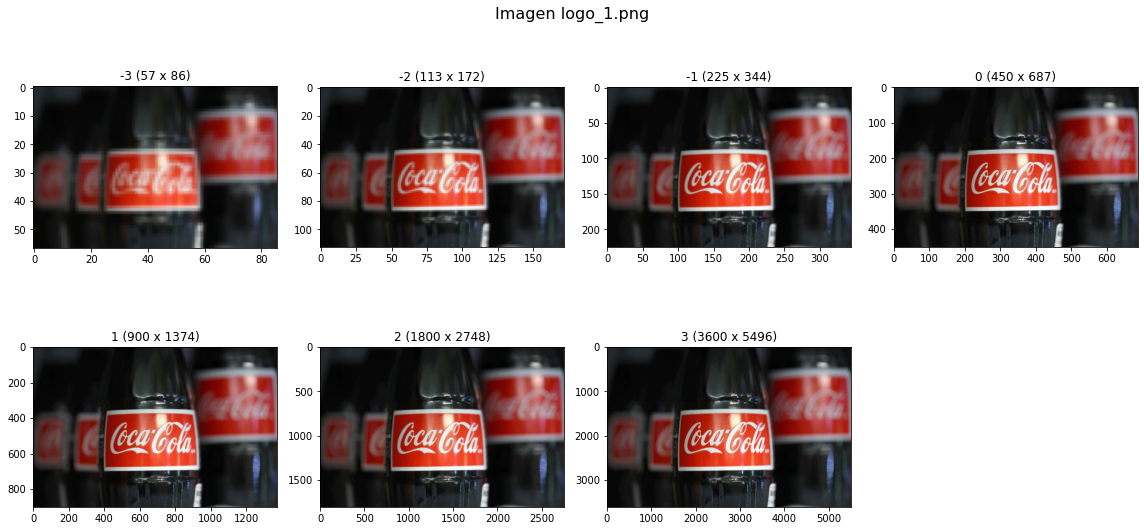

In [22]:
img_name = 'logo_1.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

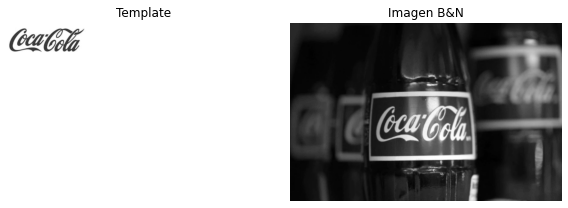

In [23]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-1.796e+07, 1.382e+07)
cv.TM_CCOEFF_NORMED (-0.1212, 0.07582)
cv.TM_CCORR (-40.0, 3.295e+08)
cv.TM_CCORR_NORMED (0.0, 0.281)
cv.TM_SQDIFF (3.428e+09, 3.717e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


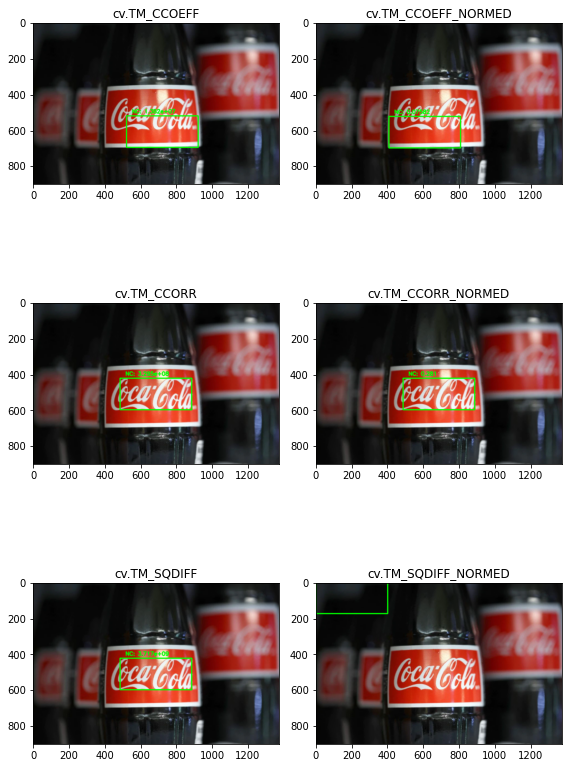

In [24]:
# Template matching usando diferentes métodos, comparando la imagen de bordes vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [25]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### coca_multi.png

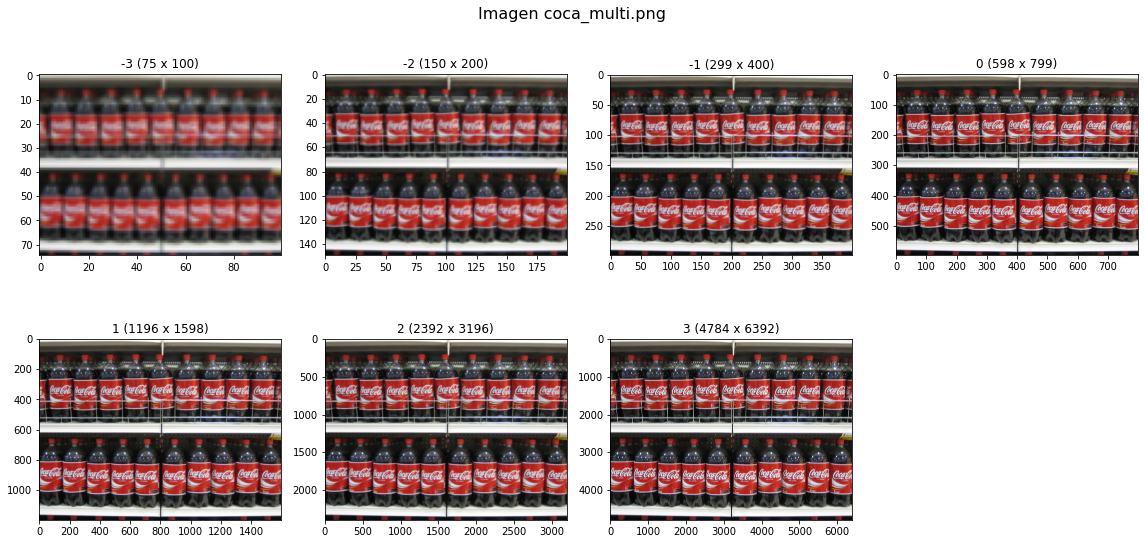

In [26]:
img_name = 'coca_multi.png'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

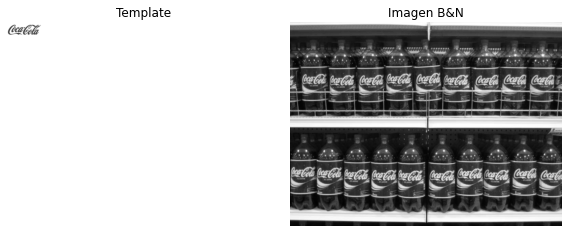

In [27]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[2].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


cv.TM_CCOEFF (-9.303e+07, 1.284e+08)
cv.TM_CCOEFF_NORMED (-0.3362, 0.5364)
cv.TM_CCORR (5.666e+07, 5.196e+08)
cv.TM_CCORR_NORMED (0.1511, 0.6914)
cv.TM_SQDIFF (1.673e+08, 2.46e+09)
cv.TM_SQDIFF_NORMED (0.8154, 1.0)


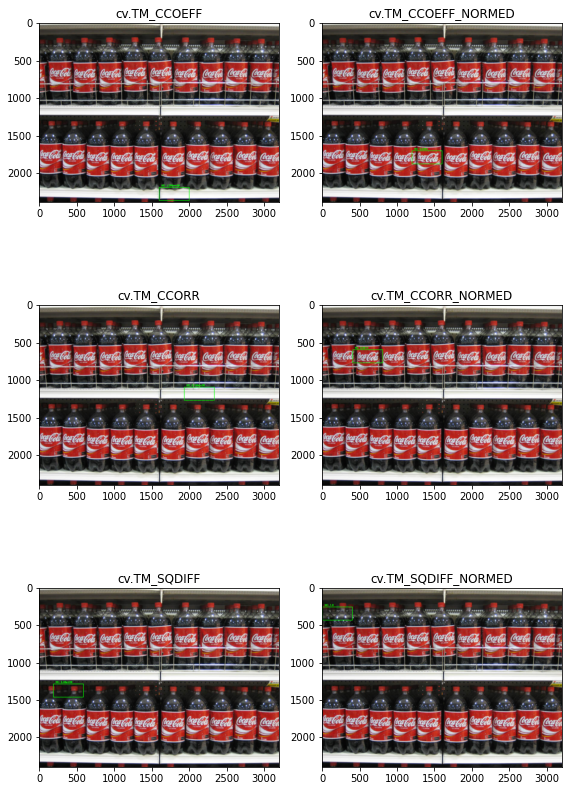

In [28]:
# Template matching usando diferentes métodos, comparando la imagen en escala de grises vs el template invertido
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo
                                              , cual_imagen=mt.IMG_GRAY
                                              , cual_template=mt.TEMPLATE_INVERTIDO
                                              )
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [29]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### otras_botellas-distintas.jpg

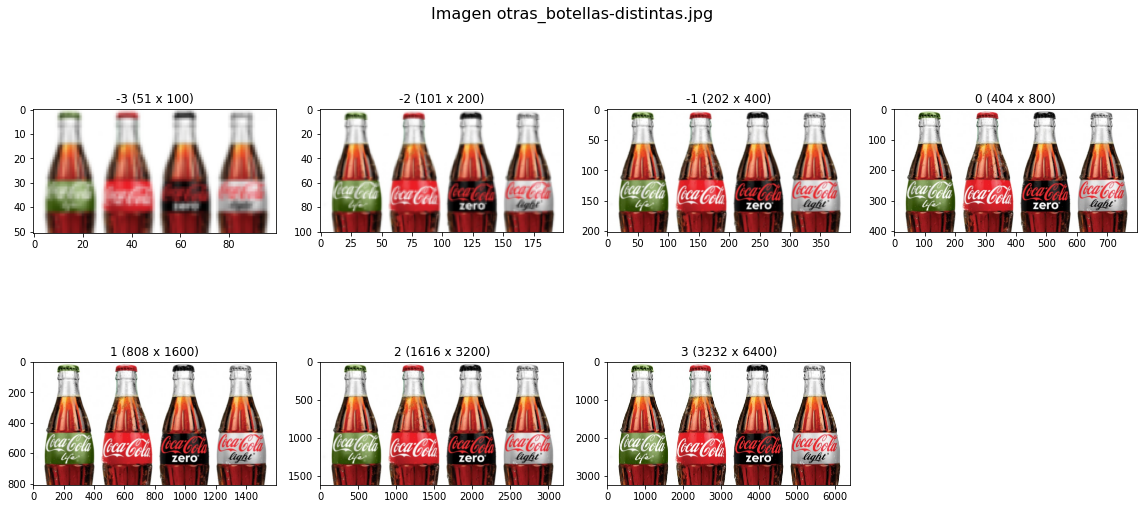

In [30]:
img_name = 'otras_botellas-distintas.jpg'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

In [31]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


En este caso el template es más grande, pero luego la función matchTemplate le hace un resize adecuado.

cv.TM_CCOEFF (-9.195e+07, 9.23e+07)
cv.TM_CCOEFF_NORMED (-0.3148, 0.3188)
cv.TM_CCORR (1.055e+08, 5.251e+08)
cv.TM_CCORR_NORMED (0.2032, 0.5952)
cv.TM_SQDIFF (6.367e+08, 3.257e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


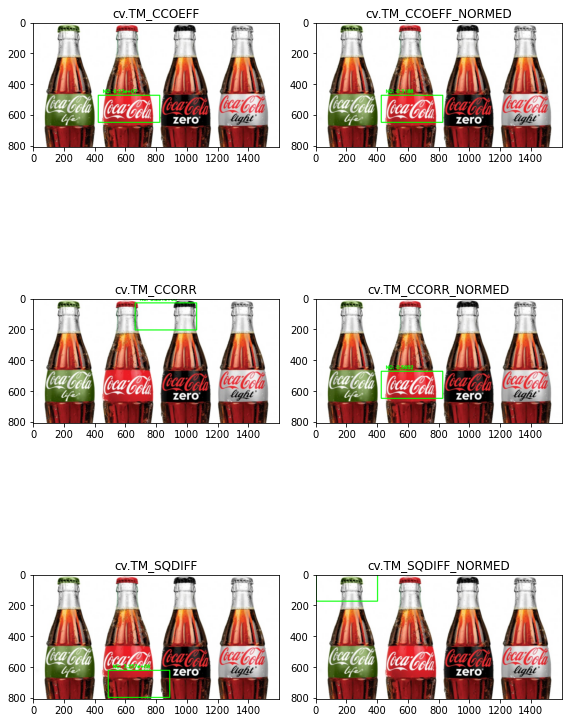

In [32]:
# Template matching usando diferentes métodos, comparando la imagen en escala de grises vs el template invertido
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo
                                              , cual_imagen=mt.IMG_GRAY
                                              , cual_template=mt.TEMPLATE_INVERTIDO
                                              )
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [33]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### otras_botellas-iguales.jpg

In [34]:
img_name = 'otras_botellas-iguales.jpg'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

In [35]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[2].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


En este caso el template es más grande, pero luego la función matchTemplate le hace un resize adecuado.

cv.TM_CCOEFF (-2.407e+07, 1.237e+07)
cv.TM_CCOEFF_NORMED (-0.1074, 0.07394)
cv.TM_CCORR (-34.0, 3.284e+08)
cv.TM_CCORR_NORMED (0.0, 0.2823)
cv.TM_SQDIFF (3.424e+09, 3.717e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


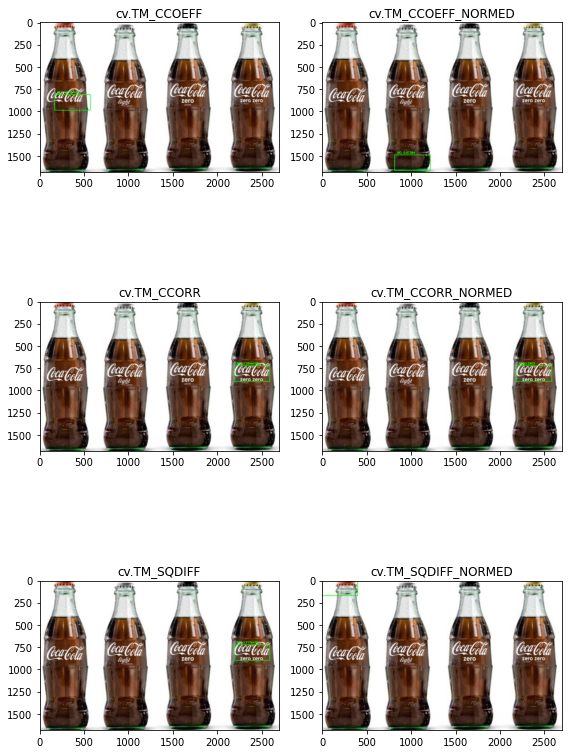

In [36]:
# Template matching usando diferentes métodos, comparando la imagen de bordes vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [37]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### otras_latas.jpg

In [38]:
img_name = 'otras_latas.jpg'
img = cv.imread('images/' + img_name)
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagenes = piramide_gaussiana(img_rgb)
img_util.plot_set_imagenes(imagenes, f'Imagen {img_name}')

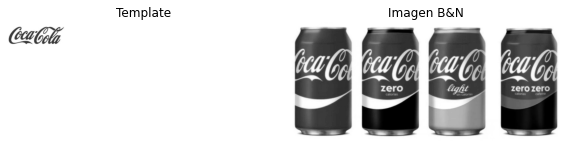

In [39]:
# selecciono la imagen más compatible en tamaño con el template
img_selected = imagenes[1].copy() # es RGB

# guardo la imagen para futuro uso
cv.imwrite('selected/' + img_name, cv.cvtColor(img_selected, cv.COLOR_RGB2BGR))

# ploteo side-by-side el template y la imagen a la misma escala
img_util.plot_template_imagen(img_selected)


En este caso el template es más grande, pero luego la función matchTemplate le hace un resize adecuado.

cv.TM_CCOEFF (-1.797e+07, 1.352e+07)
cv.TM_CCOEFF_NORMED (-0.09921, 0.08873)
cv.TM_CCORR (1.89e+07, 3.151e+08)
cv.TM_CCORR_NORMED (0.06706, 0.2767)
cv.TM_SQDIFF (3.435e+09, 3.7e+09)
cv.TM_SQDIFF_NORMED (1.0, 1.0)


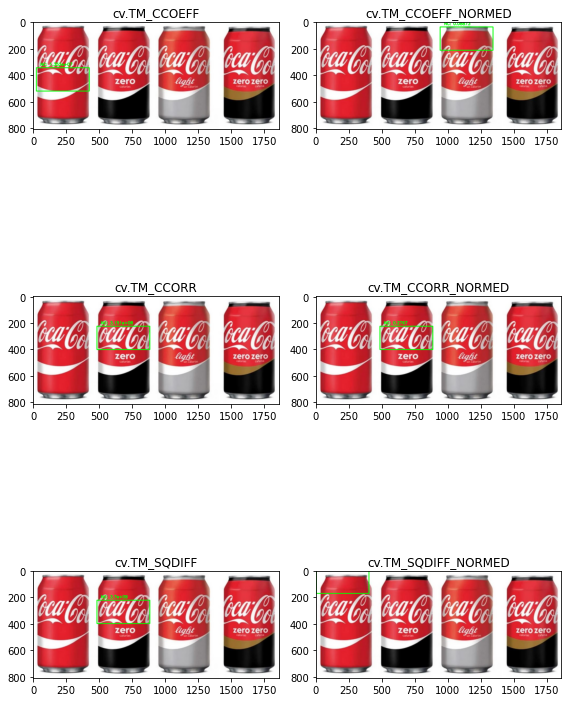

In [40]:
# Template matching usando diferentes métodos, comparando la imagen de bordes vs el template original
# Guardo los resultados en el diccionario output
output = dict()
for mm in mt.METODOS:
    metodo = eval(mm)
    resultado, salida, valores = matchTemplate(img_selected, metodo=metodo)
    print(f'{mm} ({valores[0]:.4}, {valores[1]:.4})')
    output[mm] = salida

# plot de la salida
img_util.plot_set_imagenes(output, '', columnas=2, print_size=False)

In [41]:
# Guardo el resultado de la imagen resultante de aplicar el método TM_CCORR_NORMED
img_util.save_image('matched/' + img_name, output['cv.TM_CCORR_NORMED'], img_rgb.shape)

### Resultados

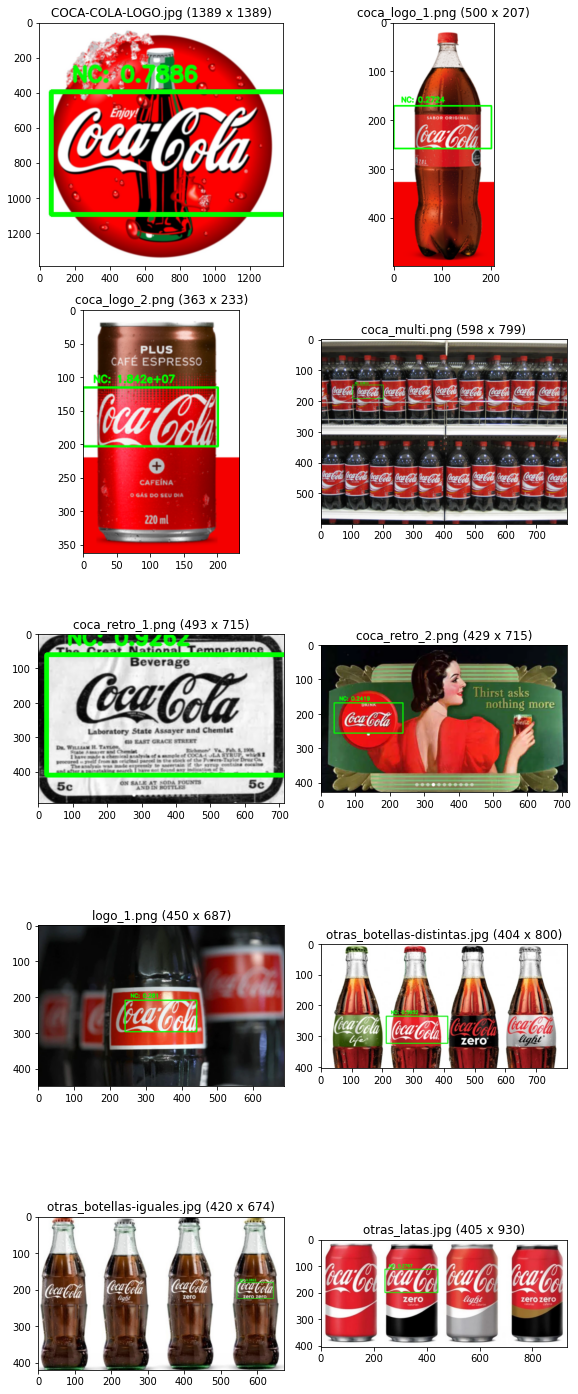

In [42]:
# Imágenes
image_names = glob.glob('matched/*')
image_names.sort()
    
output = dict()

for image_name in image_names:
    img_name_short = image_name[8:]
    img = cv.imread(image_name,cv.IMREAD_COLOR)
    # Para plotear pasamos la imagen a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    output[img_name_short] = img

img_util.plot_set_imagenes(output, '', columnas = 2)